Importing libs

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import uniform

Define paremetrs

In [43]:
num_samples = 10000
a_values = [5**13, 5**5, 2**20]
c_values = [2**31, 2**13, 5**20]
num_bins = 50
alpha = 0.05 

Define funcrion for number generation

In [44]:

def generate_random_numbers(a, c, num_samples):
    z = np.zeros(num_samples)
    x = np.zeros(num_samples)
    z[0] = 42  # Початкове значення z₀ (можна вибрати інше)
    
    for i in range(1, num_samples):
        z[i] = (a * z[i-1]) % c
        x[i] = (z[i] + c) / c
        
    return x


Define chi-sqared function for uniform distribution

In [45]:
def chi_squared_test(random_numbers, num_bins, alpha):
    observed_frequencies = np.histogram(random_numbers, bins=num_bins, density=True)[0]
    expected_frequency = uniform.pdf(np.linspace(0, 1, num_bins))
    chi_squared_statistic = np.sum((observed_frequencies - expected_frequency) ** 2 / expected_frequency)
    
    degrees_of_freedom = num_bins - 1
    chi_squared_critical = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    return chi_squared_statistic, chi_squared_critical

Code for model initialization and building plot

Параметри a=1220703125, c=2147483648
Середнє: 1.498591324453894
Дисперсія: 0.08325731073410489
Статистика Chi-squared: 25.04796761240013
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)


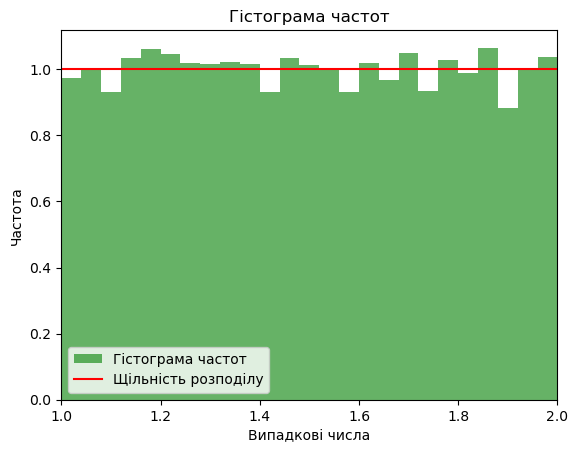

Параметри a=1220703125, c=8192
Середнє: 1.5002819091796875
Дисперсія: 0.08346876374291837
Статистика Chi-squared: 24.996225588806134
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)


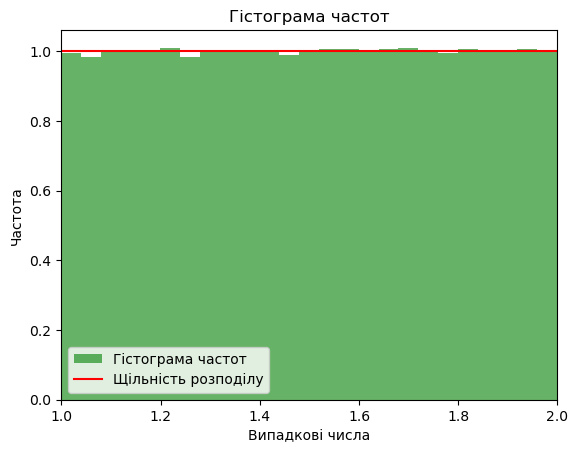

Параметри a=1220703125, c=95367431640625
Середнє: 1.5015676269593767
Дисперсія: 0.08465460297960696
Статистика Chi-squared: 25.051312500000872
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)


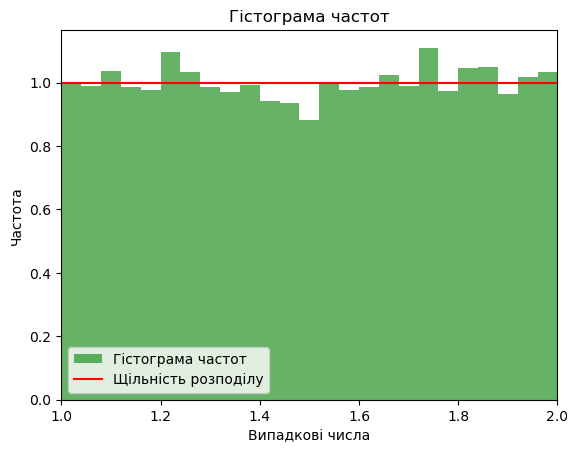

Параметри a=3125, c=2147483648
Середнє: 1.4983092040087096
Дисперсія: 0.0845645237026068
Статистика Chi-squared: 25.04526420574139
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)


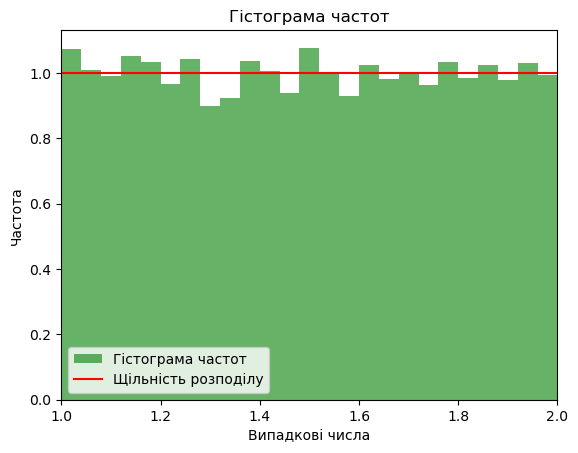

Параметри a=3125, c=8192
Середнє: 1.4992756591796874
Дисперсія: 0.08364858893182218
Статистика Chi-squared: 24.99636318956949
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)


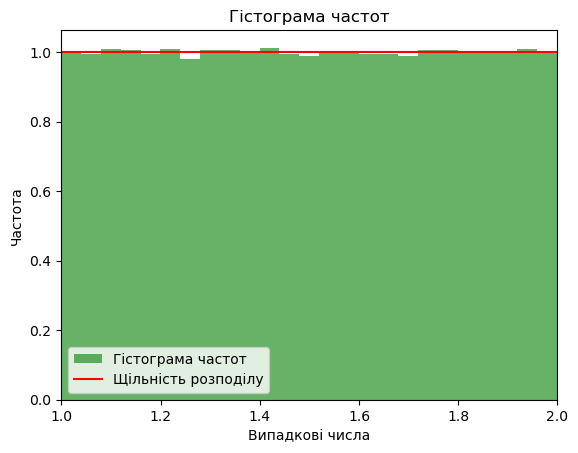

Параметри a=3125, c=95367431640625
Середнє: 0.9999013444302176
Дисперсія: 0.00010000833044040062
Статистика Chi-squared: 2384.970274923386
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу відхиляємо (розподіл не відповідає)


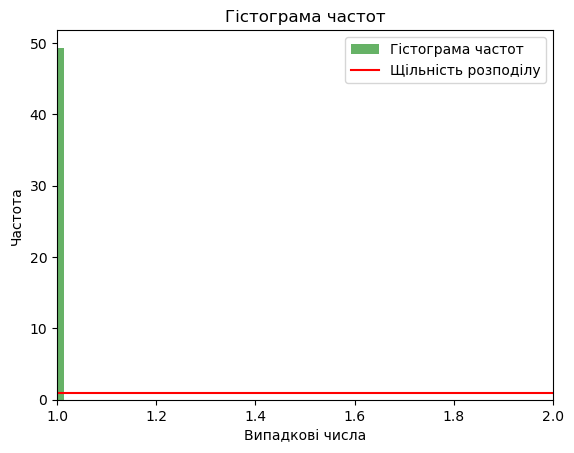

Параметри a=1048576, c=2147483648
Середнє: 0.99990205078125
Дисперсія: 0.00010003246298789976
Статистика Chi-squared: 2351.580624332232
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу відхиляємо (розподіл не відповідає)


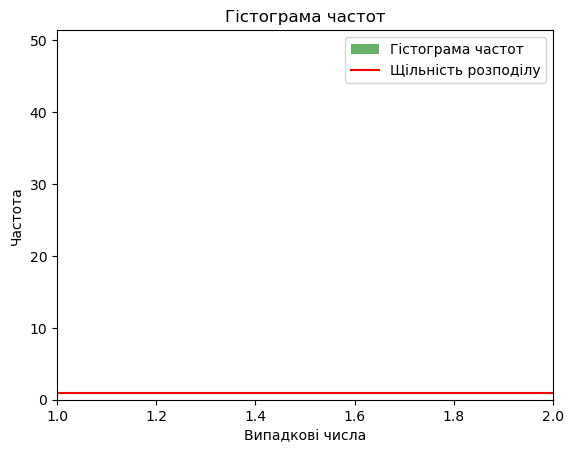

Параметри a=1048576, c=8192
Середнє: 0.9999
Дисперсія: 9.999000000000009e-05
Статистика Chi-squared: 2449.5000499999956
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу відхиляємо (розподіл не відповідає)


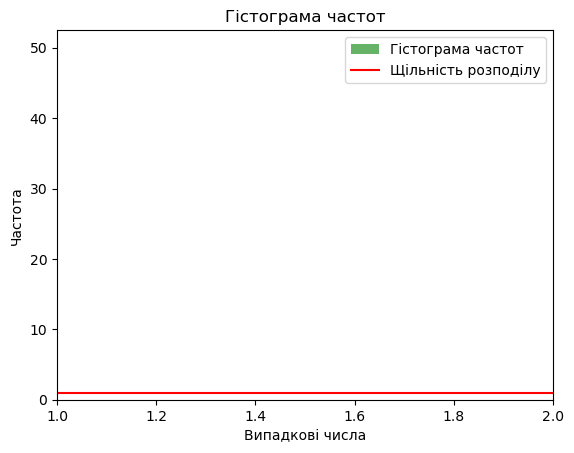

Параметри a=1048576, c=95367431640625
Середнє: 1.5032066991055484
Дисперсія: 0.08385927169530784
Статистика Chi-squared: 25.040225224601464
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)


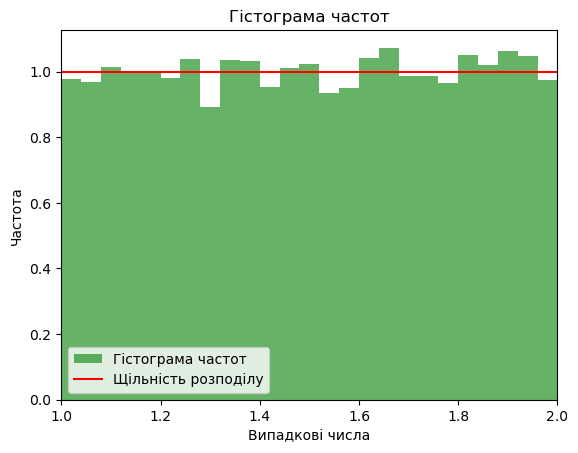

In [46]:
for a in a_values:
    for c in c_values:
        random_numbers = generate_random_numbers(a, c, num_samples)
        
        # Побудова гістограми частот
        plt.hist(random_numbers, bins=num_bins, density=True, alpha=0.6, color='g', label='Гістограма частот')
        
        # Визначення середнього і дисперсії
        mean = np.mean(random_numbers)
        variance = np.var(random_numbers)
        
        chi_squared_statistic, chi_squared_critical = chi_squared_test(random_numbers, num_bins, alpha)
        uniform_pdf = uniform.pdf(np.linspace(0, 1, num_bins))

        # Побудова графіку щільності розподілу
        plt.plot(np.linspace(1, 2, num_bins), uniform_pdf, 'r-', label='Щільність розподілу')

        # Виведення результатів
        print(f'Параметри a={a}, c={c}')
        print(f'Середнє: {mean}')
        print(f'Дисперсія: {variance}')
        print(f'Статистика Chi-squared: {chi_squared_statistic}')
        print(f'Критичне значення Chi-squared: {chi_squared_critical}')
        
        # Порівняння результатів тесту з критичним значенням
        if chi_squared_statistic <= chi_squared_critical:
            print('Нульову гіпотезу не відхиляємо (розподіл відповідає)')
        else:
            print('Нульову гіпотезу відхиляємо (розподіл не відповідає)')
        
        # Показ графіку
        plt.xlim(1, 2)
        plt.legend()
        plt.xlabel('Випадкові числа')
        plt.ylabel('Частота')
        plt.title('Гістограма частот')
        plt.show()
